O seguinte Projeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito

TODO
1. Melhorar comentarios para que projeto sirva de entrega
2. Implementar early stopping no svc
3. Rodar projeto com numero alto de trials e interacoes, esta primeira rodada eh so para testar se nada quebra

#Organização e separação dos dados

Nesse passo do projeto, fizemos a coleta do dataset e logo após os dividimos em 3 conjuntos distintos, dataset para treinamento, validação e testes

In [1]:

import numpy as np
import pandas as pd

import os
import optuna

In [2]:

dataset = pd.read_csv('TRNcod.xls', delimiter = "\t")

In [3]:
dataset 

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389191,389191,1,1,0,0,0,0,1,0.787827,1,...,0,1,1,1,1,1,0,1,0,1
389192,389192,1,0,1,0,0,0,1,0.470010,1,...,1,0,1,0,1,0,1,1,1,0
389193,389193,0,1,0,1,0,0,1,0.436048,0,...,1,0,0,1,0,1,1,0,0,1
389194,389194,1,0,1,0,1,0,0,0.677875,0,...,0,1,0,0,0,1,1,1,1,0


In [4]:
dataset[(dataset['IND_BOM_1_1']==1) & (dataset['IND_BOM_1_2']==1)]

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2


In [5]:
dataset[dataset['IND_BOM_1_1']==1].groupby("IND_BOM_1_2").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
IND_BOM_1_2,,,,,,,,,,,,,,,,,,,,,
0,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,...,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098


In [6]:
dataset[dataset['IND_BOM_1_2']==1].groupby("IND_BOM_1_1").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_2
IND_BOM_1_1,,,,,,,,,,,,,,,,,,,,,
0,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,...,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098


In [7]:
dataset.drop(columns=['INDEX'], inplace=True)

In [8]:
dataset.describe()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,...,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,0.134915,...,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,0.133136,...,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507866e-01,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375241e-01,1.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.578835e-01,1.000000,0.111111,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print("Separando classes...")
class_1 = dataset[dataset['IND_BOM_1_1']==1]
class_2 = dataset[dataset['IND_BOM_1_2']==1]
class_1 = class_1.sample(frac=1)
class_2 = class_2.sample(frac=1)

Separando classes...


In [10]:
print("Dividindo dados em treinamento, validação e teste")
class_1_train, class_1_validate, class_1_test = np.split(class_1,[int(0.5*len(class_1)),int(0.75*len(class_1))])
class_2_train, class_2_validate, class_2_test = np.split(class_2,[int(0.5*len(class_2)),int(0.75*len(class_2))])  

Dividindo dados em treinamento, validação e teste


In [11]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 67049 Validação: 33524 Teste: 33525


In [12]:
print("Repetindo dados de treino e validação da classe 2")
while len(class_2_train) < len(class_1_train):
  count = (len(class_1_train)-len(class_2_train)) % len(class_2_train)
  class_2_train = pd.concat([class_2_train[:count],class_2_train])
while len(class_2_validate) < len(class_1_validate):
  count = (len(class_1_validate)-len(class_2_validate)) % len(class_2_validate)
  class_2_validate = pd.concat([class_2_validate[:count],class_2_validate])


Repetindo dados de treino e validação da classe 2


In [13]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 127549 Validação: 63774 Teste: 33525


In [14]:
print("Juntandos dados das classes de acordo com o tipo de separação")
data_train = pd.concat([class_1_train,class_2_train])
data_train = data_train.sample(frac=1)
data_validate = pd.concat([class_1_validate,class_2_validate])
data_validate = data_validate.sample(frac=1)
data_test = pd.concat([class_1_test,class_2_test])
data_test = data_test.sample(frac=1)

Juntandos dados das classes de acordo com o tipo de separação


In [15]:
print("Treinamento:",len(data_train),"Validação:",len(data_validate),"Teste:",len(data_test))

Treinamento: 255098 Validação: 127548 Teste: 97300


In [16]:
print(data_train.iloc[0])

UF_1           1.0
UF_2           1.0
UF_3           0.0
UF_4           1.0
UF_5           0.0
              ... 
CEP4_12        1.0
CEP4_13        0.0
CEP4_14        0.0
IND_BOM_1_1    0.0
IND_BOM_1_2    1.0
Name: 290732, Length: 245, dtype: float64


In [17]:
x_train = data_train.iloc[:,:-2]
y_train = data_train.iloc[:,-2:]
x_validate = data_validate.iloc[:,:-2]
y_validate = data_validate.iloc[:,-2:]
x_test = data_test.iloc[:,:-2]
y_test = data_test.iloc[:,-2:]

In [18]:
y_train[(y_train['IND_BOM_1_1']==1) & (y_train['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [19]:
y_validate[(y_validate['IND_BOM_1_1']==1) & (y_validate['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [20]:
y_test[(y_test['IND_BOM_1_1']==1) & (y_test['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [21]:
y_train2 = y_train.drop(columns=['IND_BOM_1_2'])
y_validate2 = y_validate.drop(columns=['IND_BOM_1_2'])
y_test2 = y_test.drop(columns=['IND_BOM_1_2'])

In [22]:
y_train2[y_train2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    127549
dtype: int64

In [23]:
y_train2[y_train2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    127549
dtype: int64

In [24]:
y_validate2[y_validate2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63774
dtype: int64

In [25]:
y_validate2[y_validate2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    63774
dtype: int64

In [26]:
y_test2[y_test2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63775
dtype: int64

In [27]:
y_test2[y_test2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    33525
dtype: int64

Com os processamentos realizados acima, obtemos os datasets mencionados e estamos prontos para iniciar as nossas análises com os classificadores.

#Classificadores

In [28]:

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, roc_auc_score, average_precision_score, ConfusionMatrixDisplay, auc
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import tensorflow as tf

2023-04-10 22:45:57.820878: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-10 22:45:57.822256: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:45:57.847022: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 22:45:57.847477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 22:45:58.272074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

A função abaixo será usada para geração da F1-Score, matriz de confusão, MSE (mean squared error), AUROC e precisão média

In [29]:
def my_metrics(y_true,y_pred):
  y_true = y_true['IND_BOM_1_1']
  y_pred = y_pred['IND_BOM_1_1']
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
  print(classification_report(y_true,y_pred))
  print("Erro quadrático médio: ",mean_squared_error(y_true,y_pred))
  print("Auroc:", roc_auc_score(y_true,y_pred))
  print("Precisão média: ", average_precision_score(y_true, y_pred))
  print()
  

In [30]:
def pred_name_columns(arr):
    result = pd.DataFrame(arr, columns = ['IND_BOM_1_1'])
    return result

In [31]:
def pred_scores_transf(arr):
  pred_score = []
  for a,b in arr:
    if a > b:
      pred_score.append([1,0])
    else:
      pred_score.append([0,1])
  
  return pred_name_columns(pred_score)

In [32]:
@tf.function
def ks(y_true,y_pred):
    y_true = tf.reshape(y_true,(-1,))
    y_pred = tf.reshape(y_pred,(-1,))
    length = tf.shape(y_true)[0]
    t = tf.math.top_k(y_pred,k = length,sorted =False)
    y_pred_sorted = tf.gather(y_pred,t.indices)
    y_true_sorted = tf.gather(y_true,t.indices)
    cum_positive_ratio = tf.truediv(
        tf.cumsum(y_true_sorted),tf.reduce_sum(y_true_sorted))
    cum_negative_ratio = tf.truediv(
        tf.cumsum(1- y_true_sorted),tf.reduce_sum(1- y_true_sorted))
    ks_value = tf.reduce_max(tf.abs(cum_positive_ratio - cum_negative_ratio))
    return ks_value

##MLP

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [34]:
input_dim = x_train.shape[1]

No passo abaixo utilizamos o optuna para tentar fazer a busca pelos melhores parâmetros da MLP

In [35]:
def mlp(trial):
    layers              = trial.suggest_int('layers', 1, 2)
    solver              = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    neurons             = trial.suggest_int('neurons', 2, 32)
    activation          = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    learning_rate       = trial.suggest_categorical('learning rate', ['constant', 'adaptive'])
    learning_rate_init  = trial.suggest_float('initial learning rate', 0.001, 0.1)
    mlp = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver=solver,
                    activation=activation,
                    learning_rate=learning_rate,
                    hidden_layer_sizes=(neurons,) if layers==1 else (neurons, neurons),
                    learning_rate_init=learning_rate_init, 
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    mlp_pred_class_test = mlp.predict(x_test.to_numpy())

    y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_mlp_test)
    return acc

study_0 = optuna.create_study(direction="maximize")
study_0.optimize(mlp, n_trials=16)

[I 2023-04-10 22:45:58,669] A new study created in memory with name: no-name-10af16bf-f8f4-42b6-8f58-e6c1cb2db73f
[I 2023-04-10 22:47:31,096] Trial 0 finished with value: 0.6258684480986639 and parameters: {'layers': 1, 'solver': 'lbfgs', 'neurons': 5, 'activation': 'relu', 'learning rate': 'adaptive', 'initial learning rate': 0.016551544441195845}. Best is trial 0 with value: 0.6258684480986639.
[I 2023-04-10 22:48:03,823] Trial 1 finished with value: 0.6198869475847893 and parameters: {'layers': 1, 'solver': 'sgd', 'neurons': 4, 'activation': 'relu', 'learning rate': 'adaptive', 'initial learning rate': 0.0050105351674335444}. Best is trial 0 with value: 0.6258684480986639.
[I 2023-04-10 22:49:42,316] Trial 2 finished with value: 0.6288900308324769 and parameters: {'layers': 1, 'solver': 'sgd', 'neurons': 13, 'activation': 'logistic', 'learning rate': 'adaptive', 'initial learning rate': 0.0856084197423055}. Best is trial 2 with value: 0.6288900308324769.
[I 2023-04-10 23:00:32,560] 

In [36]:
study_0.best_params

{'layers': 1,
 'solver': 'sgd',
 'neurons': 13,
 'activation': 'logistic',
 'learning rate': 'adaptive',
 'initial learning rate': 0.0856084197423055}

In [37]:
mlp_opt = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='lbfgs',
                    activation='identity',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.047,
                    hidden_layer_sizes=(11,2),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.46      0.65      0.54     33525
           1       0.77      0.61      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300

Erro quadrático médio:  0.37892086330935254
Auroc: 0.6274976957757498
Precisão média:  0.7227831010451974



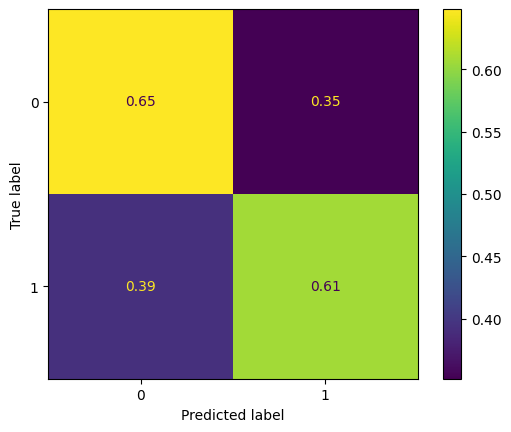

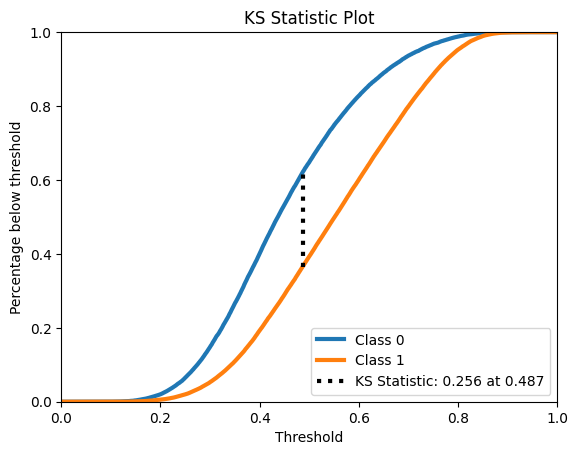

In [38]:
mlp_pred_class_test = mlp_opt.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)
my_metrics(y_test2,y_pred_mlp_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), mlp_prb_test)
plt.show()

##Random Forest

Para o random forest primeiro fizemos uma busca manual para o melhor modelo, apresentação do melhor classificador, após isso utilizamos o optuna para determinar os melhores hiper-parâmetros

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
estimators = [50,100,128]
maxDeep = [2,5,8]
maxFeatures = [None, 'sqrt']

A partir dos resultados estimados no passo acima, o melhor classificador do random forest escolhido foi o que possui n_estimators = 100, max_depth = 9 e features = 'sqrt'

In [41]:
def rf(trial):
    max_depth           = trial.suggest_int("max_depth", 2, 16)
    criterion           = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators        = trial.suggest_int("n_estimators", 8, 32)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 8)
    min_samples_split   = trial.suggest_int("min_samples_split", 2, 8)
    random_forest = RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, 
                                        criterion=criterion, 
                                        bootstrap=True, 
                                        min_samples_leaf=min_samples_leaf, 
                                        min_samples_split=min_samples_split).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    rf_pred_class_test = random_forest.predict(x_test.to_numpy())
    y_pred_rf_test = pred_name_columns(rf_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_rf_test)
    return acc

    # rf_pred_class  = random_forest.predict(df_validacao)
    # rf_pred_scores = random_forest.predict_proba(df_validacao)

study_1 = optuna.create_study(direction="maximize")
study_1.optimize(rf, n_trials=16)

[I 2023-04-11 02:30:24,801] A new study created in memory with name: no-name-2747b1b4-57dd-4a8c-af6b-76ac761a1344
[I 2023-04-11 02:30:34,309] Trial 0 finished with value: 0.6126824254881809 and parameters: {'max_depth': 9, 'criterion': 'entropy', 'n_estimators': 12, 'min_samples_leaf': 6, 'min_samples_split': 7}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:30:41,742] Trial 1 finished with value: 0.579393627954779 and parameters: {'max_depth': 3, 'criterion': 'entropy', 'n_estimators': 28, 'min_samples_leaf': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:30:49,796] Trial 2 finished with value: 0.6095477903391573 and parameters: {'max_depth': 12, 'criterion': 'entropy', 'n_estimators': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:31:10,082] Trial 3 finished with value: 0.6256628982528263 and parameters: {'max_depth': 15, 'criterion': 'entropy', 'n_est

In [83]:
optuna.visualization.plot_optimization_history(study_1)

In [84]:
optuna.visualization.plot_slice(study_1)

In [85]:
optuna.visualization.plot_param_importances(study_1)

In [46]:
study_1.best_params

{'max_depth': 16,
 'criterion': 'gini',
 'n_estimators': 24,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

In [47]:
rf_classifier = RandomForestClassifier(n_estimators=26,
                                       max_depth=16,
                                       min_samples_leaf=4,
                                       min_samples_split=7,
                                       max_features='sqrt',
                                       criterion='gini')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.64      0.54     33525
           1       0.77      0.63      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.63      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.3660431654676259
Auroc: 0.6344774738511108
Precisão média:  0.7266077884615435



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



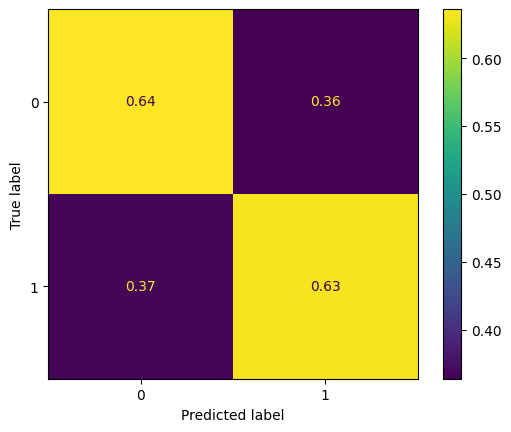

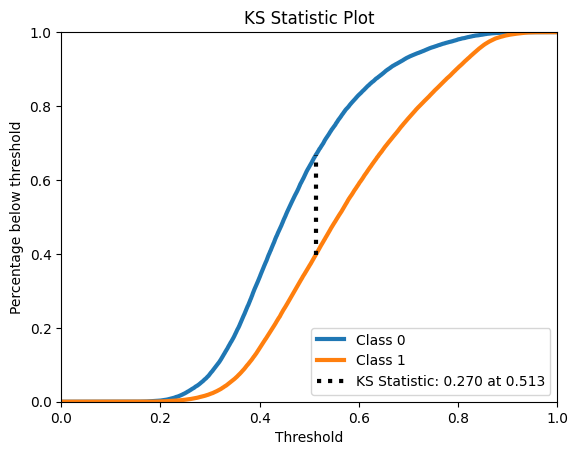

In [48]:
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test2,y_pred_rf_test)


rf_prb_test = rf_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

Comparando o modelo feito manualmente pela equipe com o os melhores parâmetros apresentados pelo optuna, o modelo do estudo do optuna apresentou resultados melhores, com 63% de acurácia e ks de 0.272, além disso o estudo do optuna mostrou que o hiper-parâmetro que possuiu a maior relevância para o classificador foi o de max_depth com 97% de importância.

## Gradient Boost

Para o gradient boost foi feito do uso do optuna para achar os melhores hiper-parâmetros do classificador

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
def gb(trial):
    loss                = trial.suggest_categorical("loss", ["deviance", "exponential"])
    max_depth           = trial.suggest_int("max_depth", 16, 64)
    subsample           = trial.suggest_float("subsample", 0.01, 0.7)
    n_estimators        = trial.suggest_int("n_estimators", 8, 32)
    learning_rate       = trial.suggest_float("learning_rate", 0.01, 0.7)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 8)
    
    gradient_boost = GradientBoostingClassifier(n_estimators = n_estimators, 
                                            max_depth = max_depth, 
                                            min_samples_leaf = min_samples_leaf, 
                                            learning_rate = learning_rate, 
                                            loss = loss, 
                                            subsample = subsample).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())

    y_pred_gb_test = pred_name_columns(gb_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_gb_test)
    return acc

study_2 = optuna.create_study(direction="maximize")
study_2.optimize(gb, n_trials=16)

[I 2023-04-11 02:35:12,686] A new study created in memory with name: no-name-9abb5ccb-2eb4-48a7-a7ca-6dcc8b550f87
[I 2023-04-11 02:38:48,297] Trial 0 finished with value: 0.6278108941418294 and parameters: {'loss': 'exponential', 'max_depth': 30, 'subsample': 0.5937883409435528, 'n_estimators': 8, 'learning_rate': 0.5097870697119745, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6278108941418294.
[I 2023-04-11 02:39:11,442] Trial 1 finished with value: 0.5718602261048304 and parameters: {'loss': 'exponential', 'max_depth': 23, 'subsample': 0.061820994881703624, 'n_estimators': 10, 'learning_rate': 0.44756866303459597, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6278108941418294.
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

[I 2023-04-11 02:41:04,822] Trial 2 finish

In [51]:
gradient_boost = GradientBoostingClassifier(n_estimators = 28, 
                                            max_depth = 62, 
                                            min_samples_leaf = 7, 
                                            learning_rate = 0.49109966110029046, 
                                            loss = 'deviance', 
                                            subsample = 0.6811509590280894).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



              precision    recall  f1-score   support

           0       0.49      0.39      0.43     33525
           1       0.71      0.79      0.75     63775

    accuracy                           0.65     97300
   macro avg       0.60      0.59      0.59     97300
weighted avg       0.63      0.65      0.64     97300

Erro quadrático médio:  0.35083247687564234
Auroc: 0.5869052477848608
Precisão média:  0.6979319564459249



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



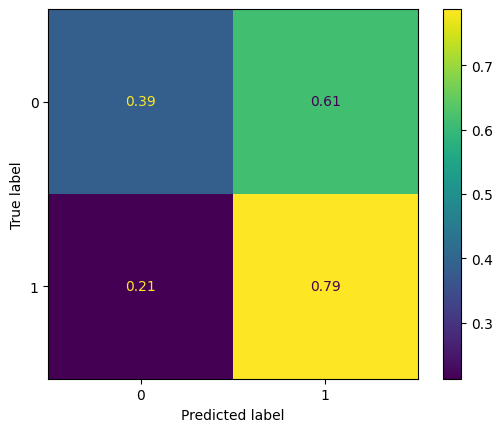

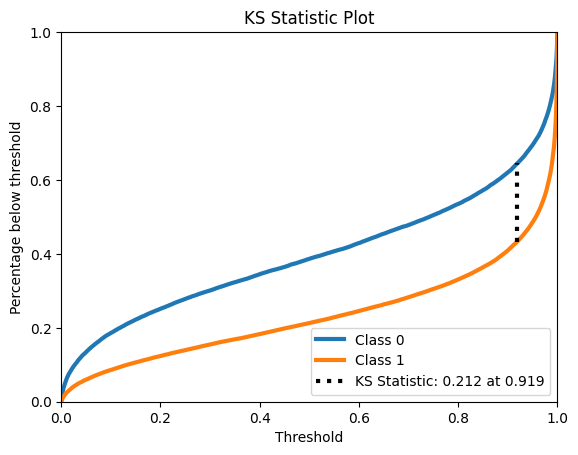

In [52]:
gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())
y_pred_gb_test = pred_name_columns(gb_pred_class_test)
my_metrics(y_test2,y_pred_gb_test)


gb_prb_test = gradient_boost.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), gb_prb_test)
plt.show()

Como é possível perceber, o gradient-boost gerou:

acurácia de 65%,

Erro quadrático médio:  0.3520760534429599,

Auroc: 0.5852774788790406,

Precisão média:  0.6970736725790391,

KS: 0.214

##Ensemble

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.models import Model
from keras import layers, optimizers, losses
# from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [54]:
y_train2.describe()

,IND_BOM_1_1
count,255098.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [55]:
print(y_train)
print(y_train2)

        IND_BOM_1_1  IND_BOM_1_2
290732            0            1
157911            1            0
151858            1            0
325945            1            0
48779             1            0
...             ...          ...
384574            1            0
73878             0            1
172043            1            0
9399              0            1
337553            0            1

[255098 rows x 2 columns]
        IND_BOM_1_1
290732            0
157911            1
151858            1
325945            1
48779             1
...             ...
384574            1
73878             0
172043            1
9399              0
337553            0

[255098 rows x 1 columns]


Criamos um classificador de Ensemble por votação, usando 3 classificadores diferentes encontrados anteriormente em ordem de performance pela estatística KS, escolhemos os modelos 8 e 9 do MLP e a última Random Forest executada que anteriormente tiveram resultados de 0.274, 0.281 e 0.265.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.63      0.68      0.66     63774
           1       0.65      0.60      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548

Erro quadrático médio:  0.3575516668234704
Auroc: 0.6424483331765296
Precisão média:  0.5931944537267206



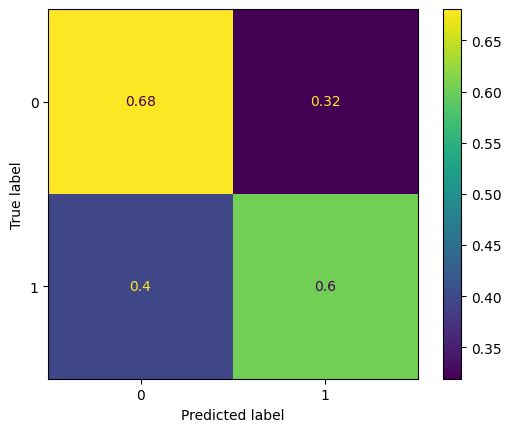

In [56]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
mlp8 = MLPClassifier(hidden_layer_sizes=(50,50), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)
mlp9 = MLPClassifier(hidden_layer_sizes=(100,50,25), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)

ensemble_classifier = VotingClassifier(
            estimators=[('mlp1', mlp8), ('rf', rf_classifier), ('mlp2', mlp9)], 
            voting='soft')

mlp8.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
mlp9.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
ensemble_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

ensemble_pred_class_val = ensemble_classifier.predict(x_validate)
y_pred_ensemble_val = pred_name_columns(ensemble_pred_class_val)
my_metrics(y_validate,y_pred_ensemble_val)

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



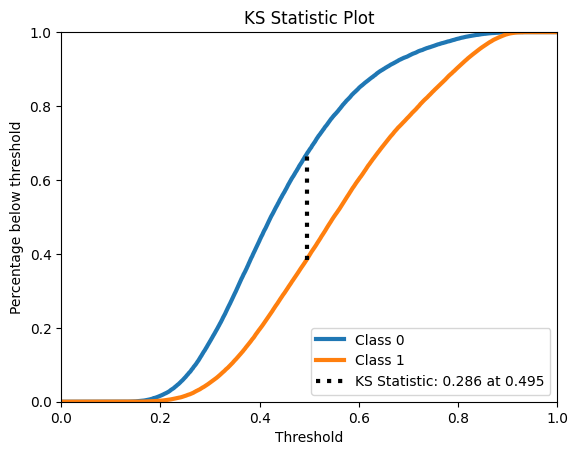

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.47      0.68      0.56     33525
           1       0.78      0.60      0.68     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.3721993833504625
Auroc: 0.6399610218507401
Precisão média:  0.7307514717059482



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



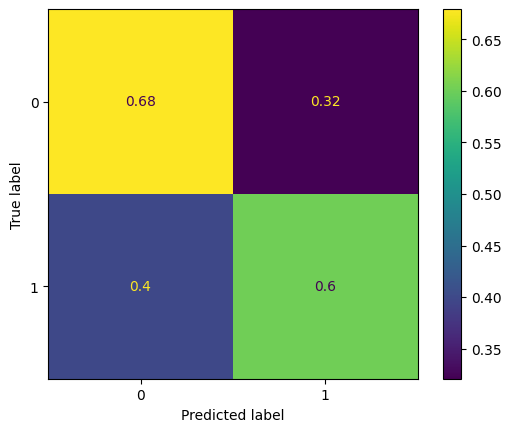

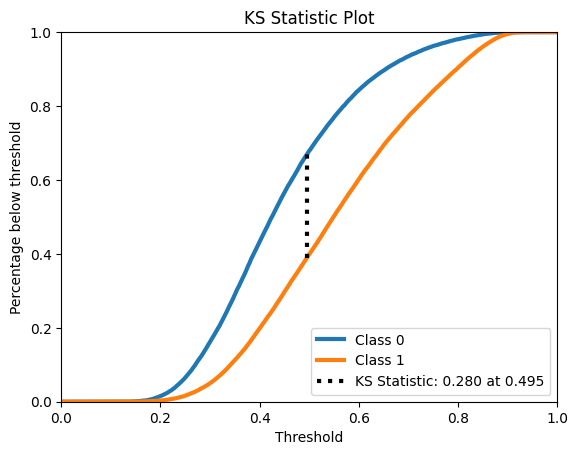

In [57]:
ensemble_prb_val = ensemble_classifier.predict_proba(x_validate)
skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_1'], ensemble_prb_val)
plt.show()

ensemble_pred_class_test = ensemble_classifier.predict(x_test)
y_pred_ensemble_test = pred_name_columns(ensemble_pred_class_test)
my_metrics(y_test,y_pred_ensemble_test)

ensemble_prb_test = ensemble_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test['IND_BOM_1_1'], ensemble_prb_test)
plt.show()

Assim obtemos uma melhora do KS para 0.287 e uma leve redução de 0.007 no MSE.

##SVC

In [58]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

### Modelo 1

In [59]:
clf = LinearSVC(C=1.3, max_iter=1000)
clf = CalibratedClassifierCV(clf)
clf.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
y_pred = clf.predict(x_test.to_numpy())


/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



              precision    recall  f1-score   support

           0       0.46      0.65      0.54     33525
           1       0.77      0.61      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300

Erro quadrático médio:  0.3789825282631038
Auroc: 0.6275992131874415
Precisão média:  0.7228537746448722



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearSVC was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearSVC was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearSVC was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearSVC was fitted without feature names

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearSVC was fitted without feature names



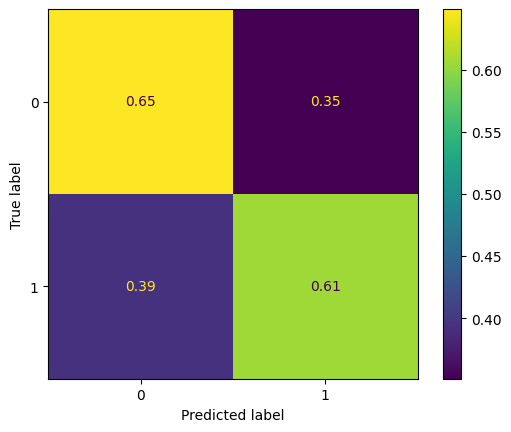

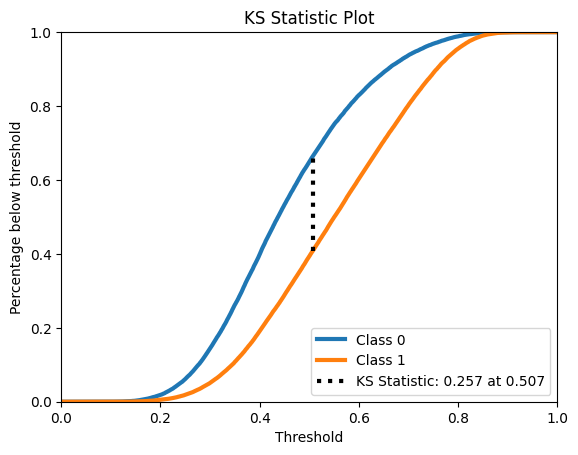

In [60]:
svm_pred_class_test = clf.predict(x_test.to_numpy())
y_pred_svm_test = pred_name_columns(svm_pred_class_test)
my_metrics(y_test2,y_pred_svm_test)


svm_prb_test = clf.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), svm_prb_test)
plt.show()

In [61]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.65      0.54     33525
           1       0.77      0.61      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



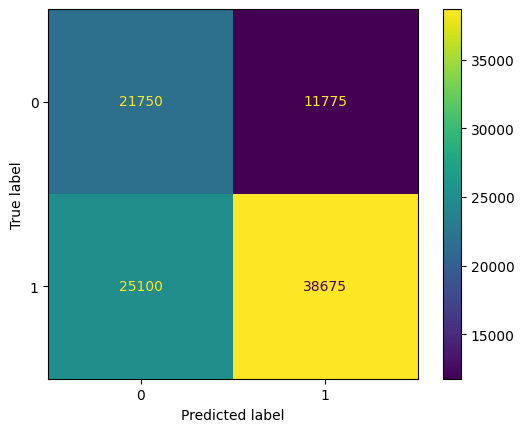

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 2

In [63]:
clf = LinearSVC(max_iter=1000)
clf = CalibratedClassifierCV(clf)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [64]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.65      0.54     33525
           1       0.77      0.61      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



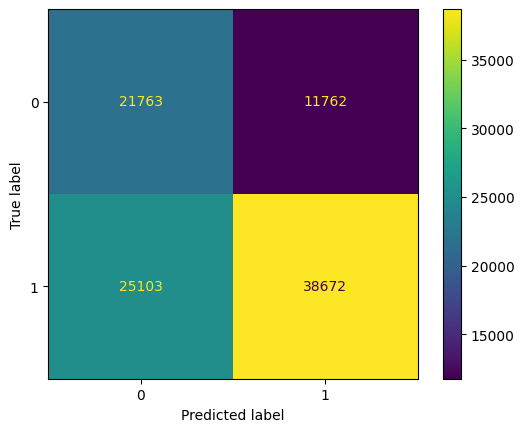

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 3

In [66]:
clf = SGDClassifier(max_iter=1000)
clf = CalibratedClassifierCV(clf)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

In [67]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.65      0.54     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



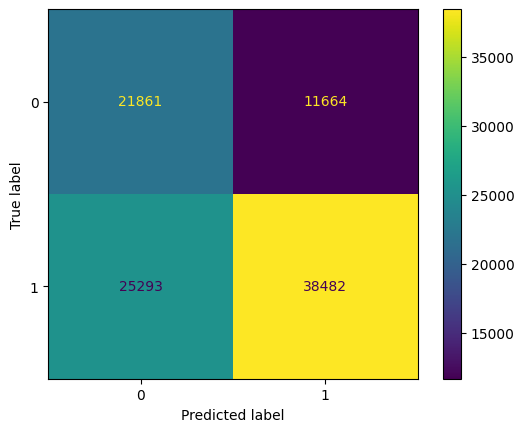

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

##Meta Classificador

In [69]:
#Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)

In [70]:
y_pred_rf_test.head(10)

,IND_BOM_1_1
0,1
1,1
2,1
3,0
4,0
5,1
6,0
7,1
8,1
9,0


In [71]:
#MLP
mlp_opt = MLPClassifier(random_state=1, 
                    max_iter=3,
                    solver='lbfgs',
                    activation='identity',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.047,
                    hidden_layer_sizes=(11,2),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

mlp_pred_class_test = mlp_opt.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [72]:
y_pred_mlp_test.head(10)

,IND_BOM_1_1
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,1
8,1
9,0


In [73]:
#SVM
svm_clf = SGDClassifier(max_iter=1000)

svm_clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = svm_clf.predict(x_test)
y_pred_svm_test = pred_name_columns(y_pred)

In [74]:
y_pred_svm_test.head(10)

,IND_BOM_1_1
0,1
1,1
2,1
3,0
4,0
5,1
6,0
7,1
8,1
9,0


In [75]:
meta_dataset = pd.concat([y_pred_rf_test.rename(columns={'IND_BOM_1_1': 'rf'}), y_pred_mlp_test.rename(columns={'IND_BOM_1_1': 'mlp'}), y_pred_svm_test.rename(columns={'IND_BOM_1_1': 'svm'})], axis=1)

In [76]:
meta_dataset.describe

<bound method NDFrame.describe of        rf  mlp  svm
0       1    0    1
1       1    0    1
2       1    1    1
3       0    0    0
4       0    0    0
...    ..  ...  ...
97295   0    0    0
97296   0    1    0
97297   1    0    1
97298   1    1    0
97299   0    1    0

[97300 rows x 3 columns]>

In [77]:
y_test['IND_BOM_1_1'].describe

<bound method NDFrame.describe of 112151    1
83147     1
265358    1
28511     0
78998     1
         ..
182291    1
201815    0
347448    1
207892    0
191432    1
Name: IND_BOM_1_1, Length: 97300, dtype: int64>

In [78]:
#Para testar o meta classificador:
rf_pred_class_valid = rf_classifier.predict(x_validate.to_numpy())
y_pred_rf_valid = pred_name_columns(rf_pred_class_valid)

mlp_pred_class_valid = mlp_opt.predict(x_validate.to_numpy())
y_pred_mlp_valid = pred_name_columns(mlp_pred_class_valid)

y_pred_svm = svm_clf.predict(x_validate)
y_pred_svm_valid = pred_name_columns(y_pred_svm)

meta_dataset_valid = pd.concat([y_pred_rf_valid.rename(columns={'IND_BOM_1_1': 'rf'}), y_pred_mlp_valid.rename(columns={'IND_BOM_1_1': 'mlp'}), y_pred_svm_valid.rename(columns={'IND_BOM_1_1': 'svm'})], axis=1)

In [79]:
#Meta Classificador GB
gradient_boost = GradientBoostingClassifier(n_estimators = 28, 
                                            max_depth = 62, 
                                            min_samples_leaf = 7, 
                                            learning_rate = 0.49109966110029046, 
                                            loss = 'deviance', 
                                            subsample = 0.6811509590280894).fit(meta_dataset.to_numpy(), y_test2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63774
           1       0.50      1.00      0.67     63774

    accuracy                           0.50    127548
   macro avg       0.25      0.50      0.33    127548
weighted avg       0.25      0.50      0.33    127548

Erro quadrático médio:  0.5
Auroc: 0.5
Precisão média:  0.5



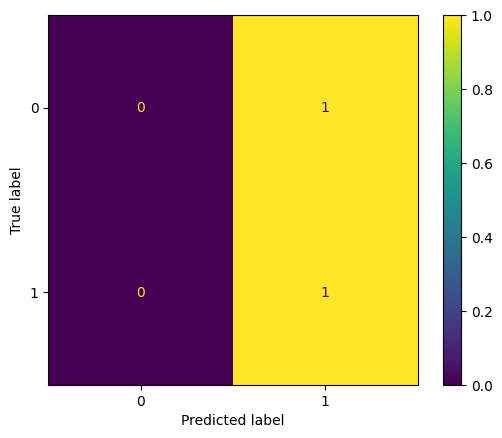

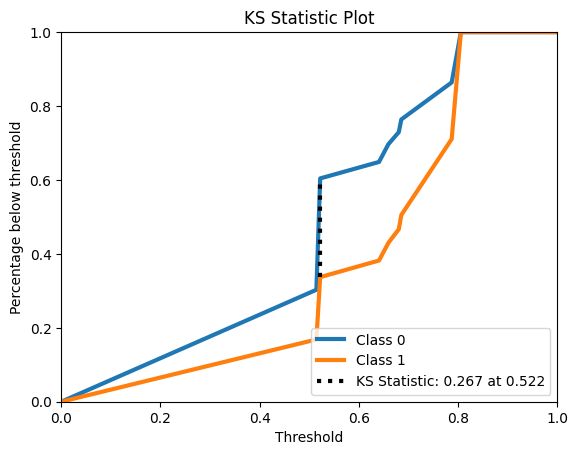

In [80]:
#Testando o meta classificador
gb_pred_class_validate = gradient_boost.predict(meta_dataset_valid.to_numpy())
y_pred_gb_valid = pred_name_columns(gb_pred_class_validate)
my_metrics(y_validate2,y_pred_gb_valid)


gb_prb_valid = gradient_boost.predict_proba(meta_dataset_valid)
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), gb_prb_valid)
plt.show()

# Conclusões


Nosso melhor modelo gerado foi o Ensemble com acurácia de aproximadamente 64%, Auroc de 0.64, MSE de (0.36) e KS de 0.288

Com isso nós finalizamos o nosso projeto que gerou as mais diversas experiências e aprendizados na área, entendemos bem o desafio que é lidar com um grande dataset e quão dificil é treina-lo e molda-lo corretamente e acreditamos que foram gerados resultados satisfatórios em relação ao problema apresentado.